In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
%matplotlib inline

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [4]:
data.shape

(9134, 24)

In [5]:
#x-y split, Y=total_claim_amount

Y=data["Total Claim Amount"]
X=data.drop(["Total Claim Amount"],axis=1)

X.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [6]:
Y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: Total Claim Amount, dtype: float64

In [7]:
#A series can be concate to a df laterY.head()

print(type(Y)) 

<class 'pandas.core.series.Series'>


In [8]:
#split numerical and categorical for x

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
x_num=X.select_dtypes(np.number)
x_cat=X.select_dtypes(np.object)

In [10]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Income                         9134 non-null   int64  
 2   Monthly Premium Auto           9134 non-null   int64  
 3   Months Since Last Claim        9134 non-null   int64  
 4   Months Since Policy Inception  9134 non-null   int64  
 5   Number of Open Complaints      9134 non-null   int64  
 6   Number of Policies             9134 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 499.6 KB


In [11]:
x_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer           9134 non-null   object
 1   State              9134 non-null   object
 2   Response           9134 non-null   object
 3   Coverage           9134 non-null   object
 4   Education          9134 non-null   object
 5   Effective To Date  9134 non-null   object
 6   EmploymentStatus   9134 non-null   object
 7   Gender             9134 non-null   object
 8   Location Code      9134 non-null   object
 9   Marital Status     9134 non-null   object
 10  Policy Type        9134 non-null   object
 11  Policy             9134 non-null   object
 12  Renew Offer Type   9134 non-null   object
 13  Sales Channel      9134 non-null   object
 14  Vehicle Class      9134 non-null   object
 15  Vehicle Size       9134 non-null   object
dtypes: object(16)
memory usage: 1.1+ MB


In [12]:
#Normalize (numerical)
x_num.apply(skew)

Customer Lifetime Value          3.031782
Income                           0.286840
Monthly Premium Auto             2.123198
Months Since Last Claim          0.278541
Months Since Policy Inception    0.040158
Number of Open Complaints        2.782806
Number of Policies               1.253127
dtype: float64

In [13]:
#Normalizing data

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [14]:
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num) #X_num still an pandas dataframe
print(x_normalized.shape)
x_normalized

(9134, 7)


array([[4.90491254e-02, 9.98795451e-01, 1.22466656e-03, ...,
        8.87439538e-05, 0.00000000e+00, 1.77487908e-05],
       [9.99888829e-01, 0.00000000e+00, 1.34664469e-02, ...,
        6.01692310e-03, 0.00000000e+00, 1.14608059e-03],
       [2.55493903e-01, 9.66807936e-01, 2.14110479e-03, ...,
        7.53351684e-04, 0.00000000e+00, 3.96500886e-05],
       ...,
       [9.99934829e-01, 0.00000000e+00, 1.04110242e-02, ...,
        4.53185758e-03, 3.67447912e-04, 2.44965274e-04],
       [3.24391165e-01, 9.45912819e-01, 4.13871886e-03, ...,
        1.29334965e-04, 0.00000000e+00, 1.29334965e-04],
       [9.98972589e-01, 0.00000000e+00, 2.94508782e-02, ...,
        3.44231043e-02, 0.00000000e+00, 3.82478937e-04]])

In [15]:
x_num_norm=pd.DataFrame(x_normalized)
x_num_norm.head()

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [16]:
x_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies'],
      dtype='object')

In [17]:
x_num_norm.columns=x_num.columns
x_num_norm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [18]:
x_num_norm.shape

(9134, 7)

In [19]:
#One Hot Encoding

x_cat.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [20]:
x_cat.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [21]:
x_cat.drop(["Customer",'Effective To Date'],axis=1,inplace=True)
x_cat.head()

c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
x_cat["State"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [23]:
x_cat.shape

(9134, 14)

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
 #en_gender=array where gender will be encoded to bools
en_x = OneHotEncoder(handle_unknown='ignore')#OneHotEncoder(handle_unknown='ignore')
#categorical=where column gender is stored
en_x.fit(x_cat) 

en_x.categories_

en_x_array=en_x.transform(x_cat).toarray()
en_x_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [26]:
x_cat_en=pd.DataFrame(en_x_array)
x_cat_en.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
col_list=list([x_cat["State"].unique()])
print(type(col_list))
print(col_list)

<class 'list'>
[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)]


In [28]:
#print(en_x.categories_)
en_x.get_feature_names()

array(['x0_Arizona', 'x0_California', 'x0_Nevada', 'x0_Oregon',
       'x0_Washington', 'x1_No', 'x1_Yes', 'x2_Basic', 'x2_Extended',
       'x2_Premium', 'x3_Bachelor', 'x3_College', 'x3_Doctor',
       'x3_High School or Below', 'x3_Master', 'x4_Disabled',
       'x4_Employed', 'x4_Medical Leave', 'x4_Retired', 'x4_Unemployed',
       'x5_F', 'x5_M', 'x6_Rural', 'x6_Suburban', 'x6_Urban',
       'x7_Divorced', 'x7_Married', 'x7_Single', 'x8_Corporate Auto',
       'x8_Personal Auto', 'x8_Special Auto', 'x9_Corporate L1',
       'x9_Corporate L2', 'x9_Corporate L3', 'x9_Personal L1',
       'x9_Personal L2', 'x9_Personal L3', 'x9_Special L1',
       'x9_Special L2', 'x9_Special L3', 'x10_Offer1', 'x10_Offer2',
       'x10_Offer3', 'x10_Offer4', 'x11_Agent', 'x11_Branch',
       'x11_Call Center', 'x11_Web', 'x12_Four-Door Car',
       'x12_Luxury Car', 'x12_Luxury SUV', 'x12_SUV', 'x12_Sports Car',
       'x12_Two-Door Car', 'x13_Large', 'x13_Medsize', 'x13_Small'],
      dtype=object

In [29]:
col_list=[]

for i in x_cat:
    col_list.append(x_cat[i].unique())
    
print(col_list)

[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object), array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Suburban', 'Rural', 'Urban'], dtype=object), array(['Married', 'Single', 'Divorced'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object), array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object), array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object), array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object), ar

In [30]:
list_col=['Washington', 'Arizona', 'Nevada', 'California', 'Oregon','No', 'Yes','Basic', 'Extended', 'Premium','Bachelor', 'College', 'Master', 'High School or Below', 'Doctor','Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired','F', 'M','Suburban', 'Rural', 'Urban','Married', 'Single', 'Divorced','Corporate Auto', 'Personal Auto', 'Special Auto','Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1','Special L2', 'Corporate L1', 'Personal L2', 'Special L1','Special L3','Offer1', 'Offer3', 'Offer2', 'Offer4','Agent', 'Call Center', 'Web', 'Branch','Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car','Medsize', 'Small', 'Large']

In [31]:
len(list_col)

57

In [32]:
a=list(en_x.get_feature_names())
a

['x0_Arizona',
 'x0_California',
 'x0_Nevada',
 'x0_Oregon',
 'x0_Washington',
 'x1_No',
 'x1_Yes',
 'x2_Basic',
 'x2_Extended',
 'x2_Premium',
 'x3_Bachelor',
 'x3_College',
 'x3_Doctor',
 'x3_High School or Below',
 'x3_Master',
 'x4_Disabled',
 'x4_Employed',
 'x4_Medical Leave',
 'x4_Retired',
 'x4_Unemployed',
 'x5_F',
 'x5_M',
 'x6_Rural',
 'x6_Suburban',
 'x6_Urban',
 'x7_Divorced',
 'x7_Married',
 'x7_Single',
 'x8_Corporate Auto',
 'x8_Personal Auto',
 'x8_Special Auto',
 'x9_Corporate L1',
 'x9_Corporate L2',
 'x9_Corporate L3',
 'x9_Personal L1',
 'x9_Personal L2',
 'x9_Personal L3',
 'x9_Special L1',
 'x9_Special L2',
 'x9_Special L3',
 'x10_Offer1',
 'x10_Offer2',
 'x10_Offer3',
 'x10_Offer4',
 'x11_Agent',
 'x11_Branch',
 'x11_Call Center',
 'x11_Web',
 'x12_Four-Door Car',
 'x12_Luxury Car',
 'x12_Luxury SUV',
 'x12_SUV',
 'x12_Sports Car',
 'x12_Two-Door Car',
 'x13_Large',
 'x13_Medsize',
 'x13_Small']

In [33]:
x_cat_en.columns=list(en_x.get_feature_names())
x_cat_en.head()

,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
x_new=pd.concat([x_num_norm,x_cat_en],axis=1)
print(x_new.shape)
x_new.head()

(9134, 64)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,x0_Arizona,x0_California,x0_Nevada,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#Train-test split.

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_new,Y,test_size=0.3,random_state=100)
#split


#Linear Regression
lm=linear_model.LinearRegression()
model=lm.fit(x_train,y_train)
predictions=lm.predict(x_test)
r2_score(y_test,predictions)

0.7679695985378877

In [37]:
!pip install statsmodels

In [38]:
from statsmodels.formula.api import ols

from sklearn import metrics

In [39]:
#MSE
metrics.mean_squared_error(y_test,predictions)

18523.918446130894

In [40]:
#RMSE
(metrics.mean_squared_error(y_test,predictions,squared=False))**0.5

11.666302012323879

In [41]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

97.04065638927398

In [42]:
#R2
metrics.r2_score(y_test,predictions)

0.7679695985378877

In [43]:
# CUSTOMER ANALYSIS #7

# - use the concept of multicollinearity and remove insignificant variables

import seaborn as sns

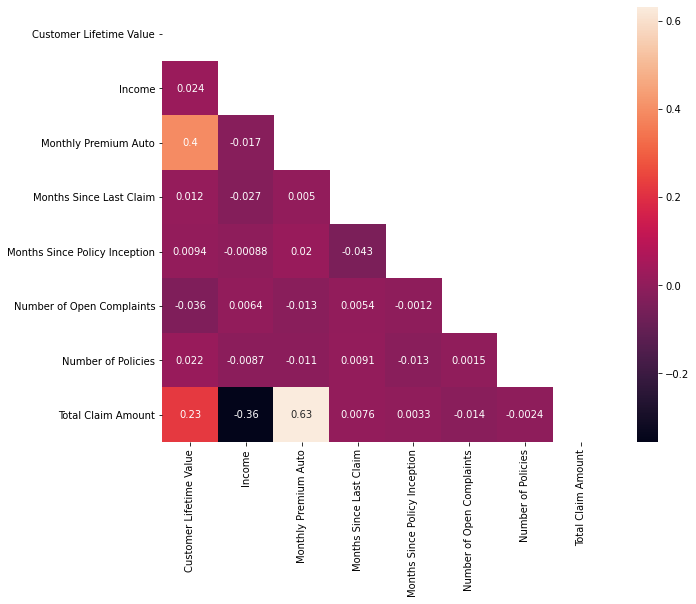

In [44]:
correlations_matrix = data.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


In [45]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [46]:
def clean_makerting_customer_analysis (x):
    x = x.rename(columns={'EmploymentStatus':'Employment Status'})#rename typos in columns
    x['Effective To Date'] = x['Effective To Date'].astype('datetime64[ns]')#datatype
    x = x.dropna()#drop nan values
            
    return x

In [47]:
data_clean = clean_makerting_customer_analysis(data)
data_clean.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,Employment Status,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [48]:
#SPLIT X Y
Y             = data_clean['Total Claim Amount'] #variable u want to predict
data_targeted = data_clean.drop('Total Claim Amount', axis = 1) #save the new dropped data

#SPLIT CATEGORICAL AND NUMERICAL
x_num = data_targeted.select_dtypes(include = np.number)#save numerical data
x_cat = data_targeted.select_dtypes(include = np.object)#save categorical data

In [49]:
x_num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [50]:
#NORMALIZE NUMERICAL DATA

norm = Normalizer()
optimusprime = norm.fit(x_num)#fit the transformer to optimusprime
x_normalized = optimusprime.transform(x_num)#transform and normalize with the fit
dfnorm = pd.DataFrame(x_normalized)

In [51]:
dfnorm.columns = x_num.columns
dfnorm.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023


In [52]:
x_cat.columns
x_cat.head(1)

,Customer,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [53]:
#TAKE OUT CUSTOMER ID
customer_data = x_cat['Customer']
x_cat_outcustomer = x_cat.drop('Customer', axis = 1)

In [54]:
x_cat_outcustomer.head(1)

,State,Response,Coverage,Education,Employment Status,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


In [55]:
#DUMMYFY CATEGORICAL DATA

data_dummy = pd.get_dummies(x_cat_outcustomer)
data_cat = data_dummy
data_cat.head(1)

,State_Arizona,State_California,State_Nevada,State_Oregon,State_Washington,Response_No,Response_Yes,Coverage_Basic,Coverage_Extended,Coverage_Premium,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [56]:
#CONCAT

concat_data = pd.concat([dfnorm,data_cat], axis = 1)
concat_data.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,State_Arizona,State_California,State_Nevada,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [57]:
optimusprime_conc = norm.fit(concat_data)#fit the transformer to optimusprime
x_normalized_conc = optimusprime.transform(concat_data)#transform and normalize with the fit
concat_norm_data = pd.DataFrame(x_normalized_conc)

In [58]:
X = concat_norm_data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=100)

In [59]:
lm = linear_model.LinearRegression()

# We "train" our linear model based on the data available on X_train and y_train
model = lm.fit(X_train,y_train)
model

LinearRegression()

In [66]:
# We make predictions on X_test
predictions  = lm.predict(X_test)
predictions

array([372. , 303.5,  27.5, ..., 329. , 665.5, 558. ])

In [68]:
sns.distplot(residuals)

NameError: name 'residuals' is not defined

In [69]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [62]:
#MSE_2

print("The MSE of the linear model is: ",round(mean_squared_error(y_test, predictions),2))

The MSE of the linear model is:  20083.67


In [63]:
#RMSE

print("The RMSE of the linear model is: ",round(mean_squared_error(y_test, predictions,squared = False),2))

The RMSE of the linear model is:  141.72


In [65]:
#MAE_2
print("The MAE of the linear model is: ",round(mean_absolute_error(y_test, predictions,squared),2))

NameError: name 'mean_absolute_error' is not defined

## Customer Analysis Round 7


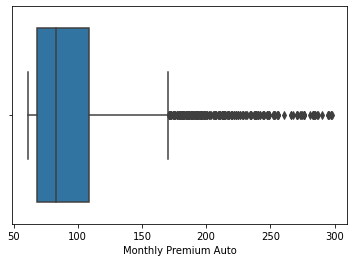

In [90]:
data_original = data.copy()

ax = sns.boxplot(x=data["Monthly Premium Auto"])

In [91]:
stats = data["Monthly Premium Auto"].describe()
stats

count    9134.000000
mean       93.219291
std        34.407967
min        61.000000
25%        68.000000
50%        83.000000
75%       109.000000
max       298.000000
Name: Monthly Premium Auto, dtype: float64

In [92]:

Q1 = stats.iloc[4]
Q3 = stats.iloc[6]
out_border_high = Q3+1.5*(Q3-Q1)
out_border_low = Q1-1.5*(Q3-Q1)

#alternative Q1, Q2 data['  '].quantile(25) for 25%

print ('high', out_border_high)
print ('low', out_border_low)

#testing quantile funcion
print(Q1)
print(np.quantile(data["Monthly Premium Auto"],0.25))

high 170.5
low 6.5
68.0
68.0


In [77]:
data[(data["Monthly Premium Auto"] < out_border_low) | (data["Monthly Premium Auto"] > out_border_high)]

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
31,UL64533,Nevada,18975.456110,No,Extended,High School or Below,1/22/11,Employed,M,65999,...,14,0,6,Corporate Auto,Corporate L2,Offer2,Agent,615.927769,Luxury SUV,Medsize
45,HG65722,Oregon,12819.102890,No,Premium,Doctor,1/25/11,Disabled,F,10105,...,4,3,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize
79,OM82309,California,58166.553510,No,Basic,Bachelor,2/27/11,Employed,M,61321,...,30,1,2,Personal Auto,Personal L3,Offer2,Branch,427.631210,Luxury Car,Small
123,SH36774,California,15023.598580,No,Basic,High School or Below,1/12/11,Employed,M,28262,...,77,0,3,Personal Auto,Personal L3,Offer3,Web,921.600000,Luxury SUV,Medsize
181,KC11055,Nevada,16936.271470,No,Extended,Bachelor,1/24/11,Employed,F,39411,...,29,2,4,Personal Auto,Personal L3,Offer3,Branch,1122.658899,Luxury Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9026,UI19516,California,16909.927670,No,Extended,College,2/22/11,Employed,M,65620,...,0,0,4,Corporate Auto,Corporate L2,Offer3,Agent,766.322388,Luxury Car,Medsize
9049,UZ14076,California,32104.699570,No,Premium,High School or Below,2/16/11,Employed,F,89546,...,18,1,2,Corporate Auto,Corporate L3,Offer3,Agent,2452.894264,Luxury SUV,Large
9096,AA93585,California,7083.642205,No,Premium,College,1/30/11,Employed,M,97024,...,68,0,1,Personal Auto,Personal L2,Offer2,Branch,686.815162,SUV,Medsize
9103,CZ57208,California,15245.254950,No,Basic,Bachelor,1/1/11,Employed,F,30205,...,1,0,4,Personal Auto,Personal L3,Offer1,Agent,1329.957905,Luxury SUV,Large


c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

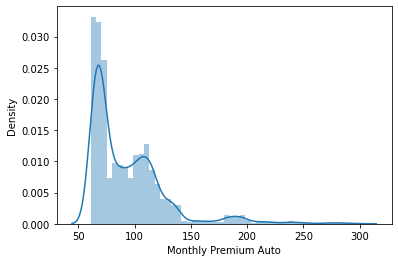

In [78]:
sns.distplot(data["Monthly Premium Auto"])


In [79]:
out_index = data[ ( data["Monthly Premium Auto"]  < out_border_low ) | ( data["Monthly Premium Auto"]  > out_border_high ) ].index
out_index

Int64Index([  31,   45,   79,  123,  181,  196,  207,  248,  292,  377,
            ...
            8911, 8920, 8923, 8943, 9020, 9026, 9049, 9096, 9103, 9125],
           dtype='int64', length=430)

In [80]:
#remove rows with those indexes - list method - puts a variable into the list 
data_test_1 = data.drop(list(out_index), inplace = False)
#reset index
data_test_1 = data_test_1.reset_index()

<AxesSubplot:xlabel='Monthly Premium Auto'>

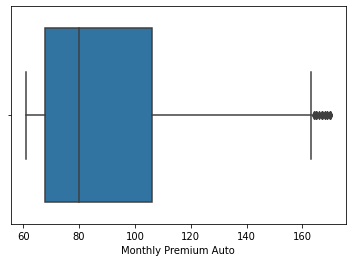

In [81]:
sns.boxplot(x=data_test_1["Monthly Premium Auto"])

c:\users\vtarv\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

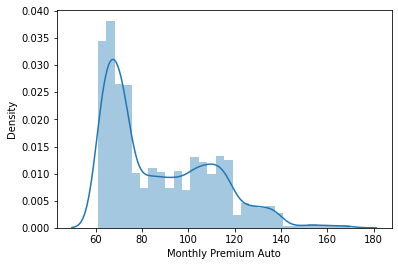

In [82]:
sns.distplot(data_test_1["Monthly Premium Auto"])

In [84]:
y_test_1 = y.drop(list(out_index), inplace = False)
y_test_1

NameError: name 'y' is not defined

In [93]:
#splitting data into 80%, 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_test_1,y_test_1,test_size = 0.2, random_state = 128)

#training - providing answers to the model
lm = model.fit(X_train, Y_train)
predictions = lm.predict(X_test) 
residuals = predictions - Y_test
sns.distplot(residuals)

NameError: name 'y_test_1' is not defined

In [94]:
MAE = mean_absolute_error(Y_test, predictions)
MSE = mean_squared_error(Y_test, predictions)
R2 = r2_score(Y_test, predictions)
RMSE = sqrt(mean_squared_error(Y_test, predictions))

#print all of them  
print('MAE = ', MAE)
print('MSE = ', MSE)
print('R2 = ', R2)
print('RMSE = ', RMSE)

NameError: name 'Y_test' is not defined